## **Intro mxnet NDArray**

* NDArray : MXNet’s primary tool for storing and transforming data
    * similar to NumPy’s multi-dimensional array
* key advantages
    * support asynchronous computation on CPU, GPU, and distributed cloud architectures
    * provide support for automatic differentiation

#### **Getting started**

In [2]:
import mxnet as mx
from mxnet import nd
mx.random.seed(1) #setting a random seed

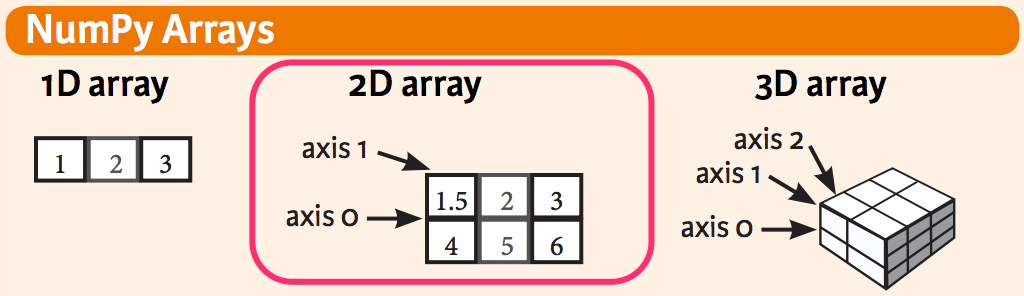

In [3]:
from IPython.display import Image
Image("/Users/hyemin/Downloads/skitch.png")

In [4]:
#1) create NDArray without any values initialized
x = nd.empty((3,4)) #2D array with 3 rows and 4 columns
print(x)


[[  0.00000000e+00   0.00000000e+00   3.50324616e-44   7.00649232e-45]
 [ -2.31826499e-28   4.57986377e-41   0.00000000e+00   7.00649232e-45]
 [ -2.31863476e-28   4.57986377e-41   0.00000000e+00   9.18425027e-41]]
<NDArray 3x4 @cpu(0)>


In [5]:
#2) create all zero matrix
x = nd.zeros((3, 5))
x


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
<NDArray 3x5 @cpu(0)>

In [6]:
#3) create all ones
x = nd.ones((3, 4))
x


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>

In [7]:
#4) random value : a standard normal distribution with zero mean and unit variance.
y = nd.random_normal(0, 1, shape=(3, 4))
y


[[-1.30644417  0.11287736 -2.63099265 -0.10713575]
 [ 0.31348416 -0.05735848 -1.11059952 -0.57651091]
 [-0.22899596  0.57960719  0.81243682  1.04484284]]
<NDArray 3x4 @cpu(0)>

In [8]:
#dimension
y.shape

(3, 4)

#### **Operations**

In [9]:
x + y


[[-0.30644417  1.11287737 -1.63099265  0.89286423]
 [ 1.31348419  0.9426415  -0.11059952  0.42348909]
 [ 0.77100402  1.57960725  1.81243682  2.04484272]]
<NDArray 3x4 @cpu(0)>

In [10]:
x * y


[[-1.30644417  0.11287736 -2.63099265 -0.10713575]
 [ 0.31348416 -0.05735848 -1.11059952 -0.57651091]
 [-0.22899596  0.57960719  0.81243682  1.04484284]]
<NDArray 3x4 @cpu(0)>

In [11]:
nd.exp(y)


[[ 0.27078119  1.11949468  0.07200695  0.8984037 ]
 [ 1.36818385  0.94425553  0.32936144  0.56185532]
 [ 0.79533172  1.78533697  2.25339246  2.84295177]]
<NDArray 3x4 @cpu(0)>

In [12]:
from IPython.display import display, Math, Latex
display(Math(r'X * Y^T'))
nd.dot(x, y.T)

<IPython.core.display.Math object>


[[-3.93169522 -1.43098474  2.20789099]
 [-3.93169522 -1.43098474  2.20789099]
 [-3.93169522 -1.43098474  2.20789099]]
<NDArray 3x3 @cpu(0)>

#### ** In-place operations**
* id() : gives us the exact address of the referenced object in memory

In [13]:
# point at this new location in memory.
print('id(y):',id(y))
y = y + x
print('id(y):', id(y))

id(y): 4553272960
id(y): 4553273296


This might be undesirable for two reasons. 
* 1) we don’t want to run around allocating memory unnecessarily all the time.
* 2) we might point at the same parameters from multiple variables. 

In [14]:
# method1
print('id(y):', id(y))
y[:] = x + y
print('id(y):', id(y))

id(y): 4553273296
id(y): 4553273296


In [15]:
# method2
print('id(x):',id(x))
x += y
x
print('id(x):',id(x))

id(x): 4557369976
id(x): 4557369976


#### ** Slicing**

In [17]:
x


[[ 1.69355583  3.11287737  0.36900735  2.89286423]
 [ 3.31348419  2.9426415   1.88940048  2.42348909]
 [ 2.77100396  3.57960725  3.81243682  4.04484272]]
<NDArray 3x4 @cpu(0)>

In [18]:
#2,3번째 row만
x[1:3]


[[ 3.31348419  2.9426415   1.88940048  2.42348909]
 [ 2.77100396  3.57960725  3.81243682  4.04484272]]
<NDArray 2x4 @cpu(0)>

In [19]:
x[1,2] #(2,3) element


[ 1.88940048]
<NDArray 1 @cpu(0)>

In [21]:
#writing to a specific element.
x[1,2] = 9.0
x


[[ 1.69355583  3.11287737  0.36900735  2.89286423]
 [ 3.31348419  2.9426415   9.          2.42348909]
 [ 2.77100396  3.57960725  3.81243682  4.04484272]]
<NDArray 3x4 @cpu(0)>

In [22]:
#Multi-dimensional slicing
x[1:2,1:3]


[[ 2.9426415  9.       ]]
<NDArray 1x2 @cpu(0)>

In [23]:
x[1:2,1:3] = 5.0
x


[[ 1.69355583  3.11287737  0.36900735  2.89286423]
 [ 3.31348419  5.          5.          2.42348909]
 [ 2.77100396  3.57960725  3.81243682  4.04484272]]
<NDArray 3x4 @cpu(0)>

#### **Broadcasting **

In [25]:
#the low-dimensional array is duplicated along any axis with dimension 11 to match the shape of the high dimensional array
x = nd.ones(shape=(3,3))
print('x = ', x)
y = nd.arange(3)
print('y = ', y)
print('x + y = ', x + y)

x =  
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 3x3 @cpu(0)>
y =  
[ 0.  1.  2.]
<NDArray 3 @cpu(0)>
x + y =  
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]
<NDArray 3x3 @cpu(0)>


In [26]:
y = y.reshape((3,1)) #3X1로 전환
print('y = ', y)
print('x + y = ', x+y)

y =  
[[ 0.]
 [ 1.]
 [ 2.]]
<NDArray 3x1 @cpu(0)>
x + y =  
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]
<NDArray 3x3 @cpu(0)>


#### **Converting from MXNet NDArray to NumPy**

In [27]:
# ndarray -> numpy
a = x.asnumpy() 
type(a)

numpy.ndarray

In [28]:
# numpy -> ndarray
y = nd.array(a) 
y


[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 3x3 @cpu(0)>